Inspired from https://colab.research.google.com/github/tensorflow/examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l06c01_tensorflow_hub_and_transfer_learning.ipynb






Udacity course:-   **Introduction to Tensorflow for Deep learning**

Transfer Learning:-


It is the method where we will use already trained model which has been trained on large datasets by all the experts and leverage those model to predict our requirements.



Concept used in this colab:-


(1) Transfer hub:   Place where all the trained model located

(2) Use the already trained model for the cats and dogs predictions




In [0]:

# Python imports

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [0]:
import tensorflow_hub as hub
from tensorflow.keras import layers

We will use MobileNet model in this colab, and this model has been trained for more than 1000 predictions output which also includes cats and dogs.

And image size in this model are 224 X 224 pixels in 3 color channels(RGB).

In [0]:
CLASSIFIER_URL ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"


IMAGE_RES = 224

model = tf.keras.Sequential([
             hub.KerasLayer(CLASSIFIER_URL, input_shape=(IMAGE_RES, IMAGE_RES, 3))                             
])

In [0]:
model

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              3540265   
Total params: 3,540,265
Trainable params: 0
Non-trainable params: 3,540,265
_________________________________________________________________


### Test the model

In [0]:
import PIL.Image as Image


grace_hopper = tf.keras.utils.get_file('image.jpeg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg') 

65536/61306 [================================] - 0s 0us/step


In [0]:
grace_hopper

'/root/.keras/datasets/image.jpeg'

In [0]:
grace_hopper = Image.open(grace_hopper).resize((IMAGE_RES, IMAGE_RES))

In [0]:
grace_hopper.size

(224, 224)

In [0]:
grace_hopper = np.array(grace_hopper)/255.0

In [0]:
grace_hopper.shape

(224, 224, 3)

Model always wants a batch of image to predict the image. So we will add the extra dimensions in the image




In [0]:
result = model.predict(grace_hopper[np.newaxis, ...])
result.shape

(1, 1001)

In [0]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

653

### Decode the prediction class

In [0]:
labels_path = tf.keras.utils.get_file('ImagesLabels.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')

16384/10484 [==============================================] - 0s 0us/step


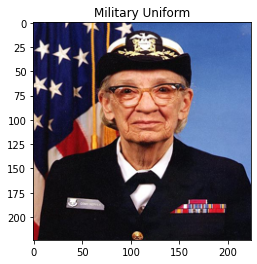

In [0]:
image_net_labels = np.array(open(labels_path).read().splitlines())


plt.imshow(grace_hopper)
predicted_class_name = image_net_labels[predicted_class]
_ = plt.title(predicted_class_name.title())

We properly decoded the image predictions

### Use Tensorflow for Cats and Dogs prediction


In [0]:
(train_examples, validation_examples), info = tfds.load(
'cats_vs_dogs',
with_info=True,
as_supervised=True,
split=['train[:80%]', 'train[80%:]']

)



num_train_examples = info.splits['train'].num_examples
num_validation_examples = info.features['label'].num_classes



/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


Shuffling and writing examples to /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incompleteYPBWJI/cats_vs_dogs-train.tfrecord



Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [0]:
# 'Images are not in the same order'

for i, examples in enumerate(train_examples.take(3)):
    print('Image: {} shape {}'.format(i+1, examples[0].shape))

Image: 1 shape (262, 350, 3)
Image: 2 shape (409, 336, 3)
Image: 3 shape (493, 500, 3)


In [0]:
## change the image to proper format



def format_image(image,label):
    image = tf.image.resize( image, (IMAGE_RES, IMAGE_RES))/255.0
    return image,label

In [0]:
BATCH_SIZE = 32
train_batches = train_examples.shuffle(num_train_examples // 4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_examples.map(format_image).batch(BATCH_SIZE).prefetch(1)

In [0]:
train_batches

<DatasetV1Adapter shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>

In [0]:
## make predictions for cats and dogs datasets

image_batch, label_batch = next(iter(train_batches.take(1)))

image_batch = image_batch.numpy()
label_batch = label_batch.numpy()




In [0]:
result_batch = model.predict(image_batch)

In [0]:
result_batch

array([[ 0.27824286, -0.7368233 ,  1.3469056 , ...,  0.71876097,
        -1.2682567 ,  0.23757498],
       [ 0.10016879, -0.8262519 ,  0.15041937, ..., -0.56160086,
        -0.19114202,  1.069119  ],
       [ 0.16674939, -0.2306521 ,  1.1330193 , ..., -1.0852531 ,
         0.31217587,  1.7232573 ],
       ...,
       [ 0.10444117,  1.8874915 ,  1.1990416 , ..., -1.5196619 ,
        -0.03086136,  0.8417146 ],
       [ 0.13320315, -0.6491974 ,  0.7342945 , ..., -0.33862698,
        -0.13013864, -0.47648865],
       [ 0.21048093, -0.2008732 ,  1.9658526 , ..., -2.261215  ,
         2.021791  ,  2.1328335 ]], dtype=float32)

In [0]:
predicted_class_names =  image_net_labels[np.argmax(result_batch, axis=-1)]

In [0]:
predicted_class_names

array(['tabby', 'Egyptian cat', 'tabby', 'tabby', 'bucket',
       'Egyptian cat', 'photocopier', 'lynx', 'vizsla', 'tabby',
       'Egyptian cat', 'Persian cat', 'toy terrier', 'tiger cat',
       'malamute', 'Egyptian cat', 'collie', 'groenendael',
       'German shepherd', 'American Staffordshire terrier', 'tabby',
       'redbone', 'Brabancon griffon', 'American Staffordshire terrier',
       'tabby', 'tub', 'Lakeland terrier', 'Bouvier des Flandres',
       'tabby', 'Persian cat', 'Border collie', 'tiger cat'], dtype='<U30')

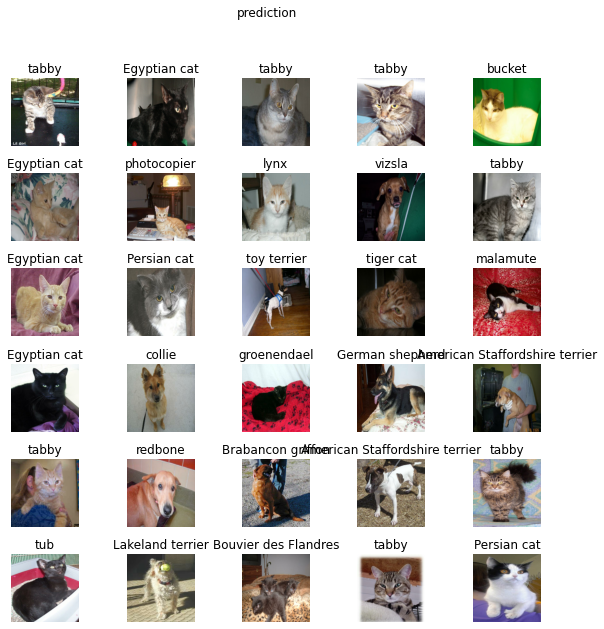

In [0]:
## viualize the predictions of cats and dogs



plt.figure(figsize=(10,10))


for n in range(30):
    plt.subplot(6,5,n+1)
    plt.subplots_adjust(hspace=0.4)
    plt.imshow(image_batch[n])
    plt.title(predicted_class_names[n])
    plt.axis('off')
    _ = plt.suptitle('prediction')

### Train the already trained model

In [0]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2"

feature_extractor = hub.KerasLayer(URL, input_shape=(IMAGE_RES, IMAGE_RES, 3))

In [0]:
feature_batch = feature_extractor(image_batch)
print(feature_batch.shape)

(32, 1280)


In [0]:
# we willnot train the last layers

feature_extractor.trainable = False

In [0]:
model = tf.keras.Sequential([
            feature_extractor,
            layers.Dense(2)
])

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [0]:
### compile the model


model.compile( optimizer='adam',
              metrics=['accuracy'],
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [0]:
EPOCHS = 6
history = model.fit(train_batches, epochs=EPOCHS, validation_data=validation_batches)

Epoch 1/6
582/582 [==============================] - 33s 56ms/step - loss: 0.0603 - accuracy: 0.9794 - val_loss: 0.0306 - val_accuracy: 0.9877
Epoch 2/6
582/582 [==============================] - 32s 55ms/step - loss: 0.0306 - accuracy: 0.9891 - val_loss: 0.0321 - val_accuracy: 0.9893
Epoch 3/6
582/582 [==============================] - 32s 55ms/step - loss: 0.0251 - accuracy: 0.9918 - val_loss: 0.0311 - val_accuracy: 0.9899
Epoch 4/6
582/582 [==============================] - 32s 54ms/step - loss: 0.0221 - accuracy: 0.9926 - val_loss: 0.0301 - val_accuracy: 0.9895
Epoch 5/6
582/582 [==============================] - 32s 55ms/step - loss: 0.0209 - accuracy: 0.9927 - val_loss: 0.0346 - val_accuracy: 0.9875
Epoch 6/6
582/582 [==============================] - 31s 54ms/step - loss: 0.0169 - accuracy: 0.9948 - val_loss: 0.0358 - val_accuracy: 0.9890


In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

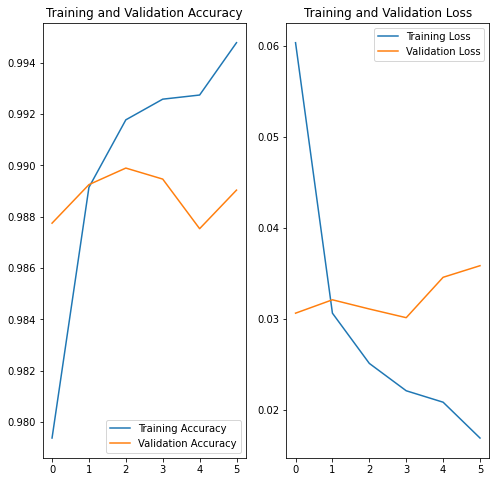

In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()